## 문장을 Tensor로 Encoding

In [1]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


In [2]:
import os

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

%matplotlib inline

In [3]:
import os
path_to_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko'

with open(path_to_file, "r") as f:
    raw = f.read().splitlines()

print("Data Size:", len(raw))

print("Example:")
for sen in raw[0:100][::20]: print(">>", sen)

Data Size: 94123
Example:
>> 개인용 컴퓨터 사용의 상당 부분은 "이것보다 뛰어날 수 있느냐?"
>> 북한의 핵무기 계획을 포기하도록 하려는 압력이 거세지고 있는 가운데, 일본과 북한의 외교관들이 외교 관계를 정상화하려는 회담을 재개했다.
>> "경호 로보트가 침입자나 화재를 탐지하기 위해서 개인적으로, 그리고 전문적으로 사용되고 있습니다."
>> 수자원부 당국은 논란이 되고 있고, 막대한 비용이 드는 이 사업에 대해 내년에 건설을 시작할 계획이다.
>> 또한 근력 운동은 활발하게 걷는 것이나 최소한 20분 동안 뛰는 것과 같은 유산소 활동에서 얻는 운동 효과를 심장과 폐에 주지 않기 때문에, 연구학자들은 근력 운동이 심장에 큰 영향을 미치는지 여부에 대해 논쟁을 해왔다.


데이터는 한국어의 형태소 분석과 품사 태깅, 기계 번역 연구를 위해 공개된 데이터   
이번에 사용할 데이터는 한국어-영어 병렬을 이루는 말뭉치 중 한국어 부분으로, 전체 병렬 말뭉치는 후에 번역기를 만들며 사용할 예정  
문장은 총 94123개

문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 60


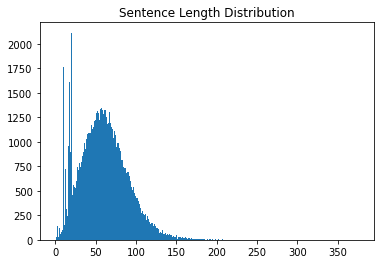

In [4]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw))

sentence_length = np.zeros((max_len), dtype=int)

for sen in raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

최단 길이 1, 최장 길이 377
1. 길이 1 짜리 문장 확인
2. 앞에 치솟는 임의의 구간 확인
3. 이용할 구간 결정

In [6]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(raw, 1)

’


길이 1인 문장은 노이즈

In [7]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 1500:
        print("Outlier Index:", idx+1)

Outlier Index: 11
Outlier Index: 19
Outlier Index: 21


In [8]:
check_sentence_with_length(raw, 11)

라고 조던이 말했다.
- 모르고 있습니다.
- 네, 보이는군요.
디즈니사만이 아니다.
큰 파티는 아니지요.
의자는 비어 있었다.
이 일은 계속됩니다.
나는 크게 실망했다.
그 이유는 간단하다.
이력서와 자기 소개서
시대가 변하고 있다.
는 돌발질문을 했다.
9. 몇 분간의 명상
하와이, 빅 아일랜드
키스를 잘 하는 방법
키스를 잘 하는 방법
스피어스가 뚱뚱한가?
산 위를 나는 느낌.
세 시간쯤 걸었을까?
(아직 읽고있습니까?
처음에는 장난이었다.
우리는 운이 좋았다.
아기가 숨을 멈출 때
건물 전체 무너져내려
그녀의 아름다운 눈.
대답은 다음과 같다.
"사과할 것이 없다.
폭탄테러가 공포 유발
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
그는 "잘 모르겠다.
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1200원대로…
더 내려야 하는 이유
케냐 야생동물 고아원
경유 1

outlier index 중 하나인, 길이가 11인 문장 확인 결과   
중복 처리가 제대로 안 된 것 확인  
중복 처리는 Python 기본 자료형 set 활용 (집합을 정의하는 자료형, 중복을 허용하지 않아 변환 과정에서 자동으로 중복 요소 제거, 대신 list 순서가 섞일 수 있음)   

중복 제거 후 다시 전체 데이터 확인

Data Size: 77591
문장의 최단 길이: 1
문장의 최장 길이: 377
문장의 평균 길이: 64


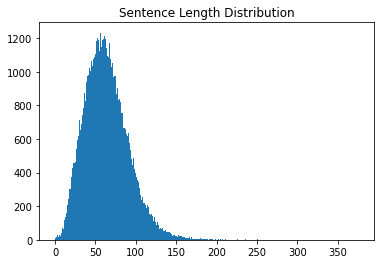

In [9]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

마지막으로 '모든 데이터를 다 사용할 것이냐'  
후에 미니 배치를 만들 것을 생각하면 모든 데이터를 다 사용하는 것은 연산 측면에서 비효율적  
미니 배치 특성상 각 데이터의 크기가 모두 동일해야 하기 때문에 가장 긴 데이터를 기준으로 Padding 처리  
위의 데이터에서 만약 길이가 100인 문장까지만 사용한다면 데이터는    
[ (77591 - 길이 100 초과 문장 수) x 100] 의 형태를 갖지만   
모두 사용할 경우 [77591 x 377] 로 전자보다 최소 3.7배 큰 메모리 차지   
길이별로 정렬하여 미니 배치를 구성해 Padding을 최소화하는 방법도 있지만 이는 데이터를 섞는 데 편향성이 생길 수 있으므로 지향   
문장 길이 150을 기준으로 이상의 데이터 제거   
너무 짧은 데이터는 오히려 노이즈로 작용할 수 있으므로 길이 10 미만 데이터 제거  

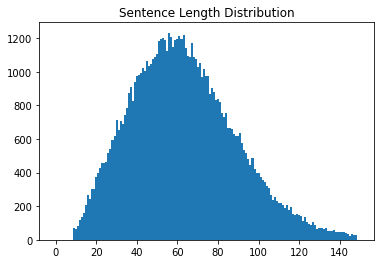

In [10]:
max_len = 150
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

### 공백 기반 토큰화
정제된 데이터 filtered_corpus를 공백 기반으로 토큰화해 리스트 split_corpus에 저장 후, tokenize() 함수를 사용해 단어 사전과 Tensor 데이터 get

In [11]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

In [12]:
split_corpus = []

for kor in filtered_corpus:
    split_corpus.append(kor.split())

In [13]:
split_tensor, split_tokenizer = tokenize(split_corpus)

print("Split Vocab Size:", len(split_tokenizer.index_word))

Split Vocab Size: 237435


In [14]:
for idx, word in enumerate(split_tokenizer.word_index):
    print(idx, ":", word)

    if idx > 10: break

0 : 이
1 : 밝혔다.
2 : 있다.
3 : 말했다.
4 : 수
5 : 있는
6 : 그는
7 : 대한
8 : 위해
9 : 전했다.
10 : 지난
11 : 이번


### 형태소 기반 토큰화
- Khaiii
- KoNLPy - MeCab

In [15]:
def mecab_split(sentence):
    return mecab.morphs(sentence)

mecab_corpus = []

for kor in filtered_corpus:
    mecab_corpus.append(mecab_split(kor))

In [16]:
mecab_tensor, mecab_tokenizer = tokenize(mecab_corpus)

print("MeCab Vocab Size:", len(mecab_tokenizer.index_word))

MeCab Vocab Size: 52279


공백 기반 단어 사전에 비해 단어 수 현저히 감소  
이는 곧 연산량의 감소 -> 더 빠른 학습, 파라미터 수 감소, 수월한 학습  
한국어를 처리할 때는 공백 기반 토큰화 지양  

### 디코딩

In [17]:
# Case 1
texts = mecab_tokenizer.sequences_to_texts([mecab_tensor[100]])
print(texts[0])

가드 세 교수 는 “ 법 을 위반 한 연예인 이나 비 연예인 이나 차별 이 없 어야 한다 ” 고 밝혔 다 .


In [18]:
# Case 2
sentence = ""

for w in mecab_tensor[100]:
    if w == 0: continue
    sentence += mecab_tokenizer.index_word[w] + " "

print(sentence)

가드 세 교수 는 “ 법 을 위반 한 연예인 이나 비 연예인 이나 차별 이 없 어야 한다 ” 고 밝혔 다 . 


## Project

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

print(tf.__version__)
print(np.__version__)
print(plt.__version__)
print(konlpy.__version__)

### Step 1. SentencePiece 설치
SentencePiece는 Google에서 제공하는 오픈소스 기반 Sentence Tokenizer/Detokenizer 로서, BPE와 unigram 2가지 subword 토크나이징 모델 중 하나를 선택해서 사용할 수 있도록 패키징한 것

기설치 완

$ pip install sentencepiece

### Step 2. SentencePiece 모델 학습

In [20]:
def tokenize(corpus):  # corpus: Tokenized Sentence's List
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='')
    tokenizer.fit_on_texts(corpus)

    tensor = tokenizer.texts_to_sequences(corpus)

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, tokenizer

tf.keras.preprocessing.text.Tokenizer에 corpus를 주고    
tokenizer.fit_on_texts(corpus)을 하면 토크나이저 내부적으로 단어사전과 토크나이저 기능을 corpus에 맞춤형으로 자동 생성

이를 위해 SentencePiece 모델 학습 과정 필요

In [21]:
import sentencepiece as spm
import os
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전에 나왔던 정제했던 corpus를 활용해서 진행해야 합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = unigram이 디폴트 적용되어 있습니다. --model_type = bpe로 옵션을 주어 변경할 수 있습니다.

!ls -l korean_spm*

sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp --model_prefix=korean_spm --vocab_size=8000
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp
  input_format: 
  model_prefix: korean_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id

-rw-r--r-- 1 root root 376816 Feb 25 03:02 korean_spm.model
-rw-r--r-- 1 root root 146213 Feb 25 03:02 korean_spm.vocab


학습된 SentencePiece 토크나이징 예시 결과 확인

In [22]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1243, 11, 302, 7, 3608, 11, 287, 38, 3]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


### Step 3. Tokenizer 함수 작성
위에서 훈련시킨 SentencePiece를 활용해 위 함수와 유사한 기능을 하는 sp_tokenize() 함수 정의  
하지만 SentencePiece가 동작하는 방식이 단순 토큰화와는 달라 완전히 동일하게 정의하기는 어려움 -> 아래 조건 만족하도록
1. 매개변수로 토큰화된 문장의 list를 전달하는 대신 온전한 문장의 list 전달
2. 생성된 vocab 파일을 읽어와 { <word> : <idx> } 형태를 가지는 word_index 사전과 { <idx> : <word> } 형태를 가지는 index_word 사전을 생성하고 함께 변환
3. 리턴값이 tensor는 앞의 함수와 동일하게 토큰화한 후 Encoding된 문장임. 바로 학습에 사용할 수 있도록 Padding 추가

In [23]:
def sp_tokenize(s, corpus): 

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

### Step 4. 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용
네이버 영화리뷰 감정 분석 태스크가 있습니다. 한국어로 된 corpus를 다루어야 하므로 주로 KoNLPy에서 제공하는 형태소 분석기를 사용하여 텍스트를 전처리해서 RNN 모델을 분류기로 사용하게 되는데요.   

만약 이 문제에서 tokenizer를 SentencePiece로 바꾸어 다시 풀어본다면 더 성능이 좋아질까요?    
KoNLPy에 있는 Mecab, kkma, Okt 등과 비교해보세요.    
(여러분들은 fasttext로 사전훈련된 Word Vector를 사용할 수 있지만 sentencepiece와 KoNLPy에 있는 형태소로 모델을 만드는 것보다 코드 수정이 많이 일어납니다. 기본적인 태스크를 끝나고(sentencepiece - KoNLPy 형태소 비교) 도전하시는걸 추천합니다.)    

- 네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하기    
- 학습된 모델로 sp_tokenize() 메소드 구현하기    
- 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델을 재학습하기    
- KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기
- SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기

### 4-1. 네이버 영화리뷰 데이터셋 준비

In [26]:
# mkdir -p $HOME/aiffel/sp_tokenizer/naver_data  
# cd $HOME/aiffel/sp_tokenizer/naver_data
# wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
# wget https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt

In [25]:
import pandas as pd
import os

train_file = os.getenv('HOME') + '/aiffel/sp_tokenizer/naver_data/ratings_train.txt'
test_file = os.getenv('HOME') + '/aiffel/sp_tokenizer/naver_data/ratings_test.txt'

# 데이터 불러오기
train_data = pd.read_csv(train_file, sep='\t')
test_data = pd.read_csv(test_file, sep='\t')

# 데이터 확인
print(train_data.head())
print(test_data.head())


         id                                           document  label
0   9976970                                아 더빙.. 진짜 짜증나네요 목소리      0
1   3819312                  흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나      1
2  10265843                                  너무재밓었다그래서보는것을추천한다      0
3   9045019                      교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정      0
4   6483659  사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...      1
        id                                           document  label
0  6270596                                                굳 ㅋ      1
1  9274899                               GDNTOPCLASSINTHECLUB      0
2  8544678             뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아      0
3  6825595                   지루하지는 않은데 완전 막장임... 돈주고 보기에는....      0
4  6723715  3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??      0


In [27]:
# 중복 제거
train_data.drop_duplicates(subset=['document'], inplace=True)
test_data.drop_duplicates(subset=['document'], inplace=True)

# 특수 문자 제거 (정규 표현식 사용)
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", regex=True)

print(f"전처리 후 학습 데이터 개수: {len(train_data)}")
print(f"전처리 후 테스트 데이터 개수: {len(test_data)}")

전처리 후 학습 데이터 개수: 146183
전처리 후 테스트 데이터 개수: 49158


문장의 최단 길이: 0
문장의 최장 길이: 140
문장의 평균 길이: 32


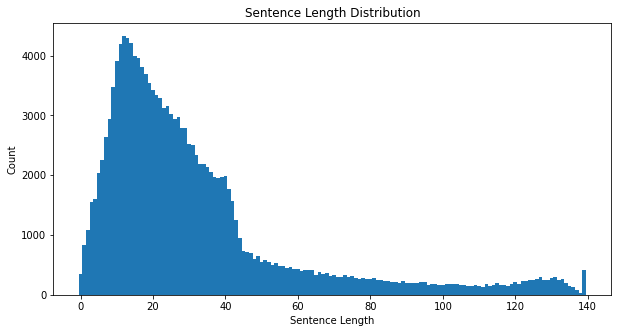

In [29]:
import matplotlib.pyplot as plt


# 리뷰 문장 리스트 추출
raw_sentences = train_data['document'].dropna().tolist()

# 문장 길이 측정
min_len = 999
max_len = 0
sum_len = 0

for sen in raw_sentences:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(raw_sentences))

# 문장 길이 분포 시각화
sentence_length = np.zeros((max_len), dtype=int)

for sen in raw_sentences:
    sentence_length[len(sen)-1] += 1

plt.figure(figsize=(10, 5))
plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.xlabel("Sentence Length")
plt.ylabel("Count")
plt.show()

In [30]:
check_sentence_with_length(raw_sentences, 0)

In [31]:
check_sentence_with_length(raw_sentences, 1)

아
점
잼
즐
끙
와
굿
 
굿
기
짱
휴
야
음
ㅎ
ㅋ
즐
굳
하
네
굿
 
굿
ㅇ
등
굿
 
ㅠ
굿
음
짱
우
쒯
 
아
점
쩝
토
 
즐
굿
똥
 
 
굿
흠
 
 
류
 
헐
점
쩝
 
삼
꽝
 
음
 
 
음
굳
굿
 
아
풉
ㅅ
아
왜
ㄴ
 
 
쉣
 
좇
봐
굿
점
까
뿌
ㅜ
자
점
 
참
ㅁ
굿
ㅉ
잼
음
흥
 
 
 
 
 
 
찜
 
 
굿


In [32]:
check_sentence_with_length(raw_sentences, 2)

최고
졸작
대박
버려
망함
굳굳
안습
대강
망작
ㅇㅇ
쵝오
최고
별루
씐나
아오
글쎄
어휴
쓰렉
짱짱
웃스
좋다
볼만
허접
비추
좋다
ㅎㅎ
아나
아휴
빠닼
읭응
ㅉㅉ
역시
만세
야동
에휴
좋다
아하
별로
오오
  
최고
대박
에혀
평이
지루
별개
오욈
ㅋㅋ
지송
별로
하네
눈물
ㅅ바
와우
  
휴우
  
쯧쯧
당연
쩔어
별노
몰입
졸잼
씨발
구림
오짱
젠장
순수
돋네
오글
이응
참나
별로
좋다
좋군
코콩
멋져
첨봄
최악
어휴
잼씀
유후
달달
감동
뭘까
광구
  
으리
  
글자
조앙
최고
잤다
표절
안습
명작
최고
으휴
좋다
글쎄
뭘봐


In [33]:
check_sentence_with_length(raw_sentences, 3)

별로다
좋구나
볼만해
로큰롤
처ㅝ주
솔직히
   
재밌다
재밌군
좋았다
재밌따
싸우자
재미무
보지마
   
볼만함
재밌군
재밌다
좋았다
완점잼
재밋네
최고다
재밌음
쓰래기
   
갑이다
죽을래
료코짱
이건뭐
청국장
재밌다
좋아요
ㅋㅋㅋ
왜봣지
재및음
좋아여
심하네
재미쪙
하하하
잼난다
쓰레기
최고다
별루 
가보자
별로야
신선함
   
   
즐ㄹㅋ
좋아요
 가자
재밋다
아ㅅㅂ
쨩이야
ㅉㅉㅉ
짱이야
별론데
재밋다
최고지
지못미
나이스
남자란
전형적
원주율
좋은테
ㅇㅅㅇ
보세요
잼없다
다섯개
떡실신
접어라
쓰중쓰
싸우자
와잼따
이건머
기영화
재밌다
감동ㅋ
깨금찡
직인다
지루해
   
짱짱짱
레전드
ㅠㅅㅠ
이연걸
   
별로임
진리임
감동적
재밌어
걍 굿
아시바
지루력
팬이다
잼있다
별로다
잼있다
잠온다
쒸레기
의리다


In [34]:
check_sentence_with_length(raw_sentences, 4)

재밋는뎅
킬링타임
아 빵점
연기 굿
좋은영화
굿 좋아
신선하네
재밌는데
    
    
ㄵ 점대
절대비추
구우우웃
펑점조절
지루하다
억지억지
목포 붹
패륜영화
좋은니다
재미없다
점만들자
괜히봤다
재미없음
지루하다
재미없다
시시하다
완벽하다
장난치냐
몰떡몰떡
이건뭥미
잼슴ㅇㅎ
짠하네요
기대된디
실망이다
보고싶다
볼만해요
사랑한다
감동ㅜㅜ
나도별로
뭥미 헐
추억돋네
좋았어요
재밌어요
좋은영화
어이상실
볼만했음
평점조절
별로네요
자자자자
재밋어요
잼있어요
돈아깝다
미치겠다
알파치노
명작ㅎㅎ
어이없다
재밌나여
눈물나다
굿입니당
옥빈님짱
재밌어요
과연ㅋㅋ
넌센스다
피크타임
아들은 
재밌었죠
중국이지
시시하네
따분하다
언제꺼임
화가난다
별로였음
뭐냐이게
개쩔었다
그지같다
재미없네
안무섭다
훈훈하당
    
아임낫뎃
푹 잤음
재밌네요
별로던데
괜찬았음
안과 겉
참쩔어요
재 밌다
좋습니다
괜찬군요
재밌네 
걍 평작
짜증나서
괜찮았음
명작이다
재밋구만
공블리짱
이정시러
ㅡㅡ 네
코믹인가
잼나ㅎㅎ
완전좋아


In [35]:
check_sentence_with_length(raw_sentences, 139)

아 진짜 조금만 더 손 좀 보면 왠만한 상업 영화 못지 않게 퀄리티 쩔게 만들어 질 수 있었는데 아쉽네요 그래도 충분히 재미있었습니다 개인적으로 조금만 더 잔인하게 더 자극적으로 노출씬도 화끈하게 했더라면 어땠을까 하는 국산영화라 많이 아낀 듯 보임
빵점이네요 다격거봣는데영어도몰라요배운것도없어요학교다닐때놀기만했어요공부가싫었어요왕따만당했어요결국우울증걸리고 화병과우울증으로 타락으로전락하여집에서아이안나옵니다그리고자살하던지범죄를이르켜서감옥갑니다그리고한명만결혼해서꼴인하고도이혼하는사람도있습니다결혼하고도자살
중국의 어거지 로마 마을 광관홍보영화 중국에 있는 저 로마마을에 가면 로마에 있는 돈 받고 같이 사진찍어주는 로마병사코스프레를 따라한 중국할배들이 돌아다님 ㅋ 실화는 개뿔 학자들에 의하면 로마인들이 저 지역에 단체이주해 살았다는 역사적 근거는 전무함
개콘빠들 빼곤 알거다 밤바야때 부터 이어진 개콘이 웃찿사한테 밀렸던 시절보다 더더욱 최악으로 떨어졌다 얼굴로 미는 개그 유행어만 미는 개그 광고를 찍으려고 하는 개그들이 눈에 보이는 개콘 도대체 서수민은 얼마나 높길래 이따구로 만들어놓고 잘리질않는가
이딴걸드라마라고썼냐 수습할수없으면걍친자녀아니면되고 간단하네 얼굴을바꿨으면 결말이라도잘정리하던가 가족땜에 밥먹을때할수없이보는데 토나올것같아서밥도못먹는다 볼때마다 오프닝이며대사며 하나하나유치하고어이가없어서웃는다ㅋㅋㅋㅋ제발빨리끝나고 더이상이딴드라마쓰지마라
보다가 어처구니가 없어서 존쿠삭이나 애드리안브로디 를 삼류로 만드는 감독의 능력 일단 각본이 말이 안되는게 너무 많다 성룡이 어렸을때 자기 동생 우는걸 막다가 죽이고 또 그거에 분해서 장군을 칼로 찌른거 맞지 사실 그냥 틀어놓고 자꾸 딴일을 하게돼서
돈이걸리니깐 연예인들도 본성 나오네요 김풍씨 여기서 첨봤는데 당신 인간성에 매우 놀랍네요 김구라 면전에 대고 좋다고소리지르고 ㅉㅉ 지가 그렇게 붙던 홍진호 떨어지게 생겼는데 글케 분위기 파악 못하나 검색하니깐 하고다니는짓도 또라이드만 면상부터 재섭음
정당화시킬려고 막판에 다시 도 바람피

문장 길이가 1이라도 리뷰의 의미가 있을 수 있으니 0인 것만 제거

In [38]:
# 결측값(NaN) 제거
train_data = train_data.dropna(subset=['document']).copy()
test_data = test_data.dropna(subset=['document']).copy()

# 문장 길이 필터링 (NaN 방지)
filtered_train_data = train_data[train_data['document'].apply(lambda x: 1 <= len(str(x)) <= 140)].copy()
filtered_test_data = test_data[test_data['document'].apply(lambda x: 1 <= len(str(x)) <= 140)].copy()

print(f"필터링 후 학습 데이터 개수: {len(filtered_train_data)}")
print(f"필터링 후 테스트 데이터 개수: {len(filtered_test_data)}")


필터링 후 학습 데이터 개수: 145791
필터링 후 테스트 데이터 개수: 48995


SentencePiece 학습 위한 corpus 준비

In [39]:
import os

# 저장 경로 설정
temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/nsmc_corpus.txt'

# SentencePiece 학습용 코퍼스 저장
with open(temp_file, 'w', encoding='utf-8') as f:
    for sentence in filtered_train_data['document']:
        f.write(sentence.strip() + '\n')

print(f"학습용 corpus 저장 완료: {temp_file}")


학습용 corpus 저장 완료: /aiffel/aiffel/sp_tokenizer/data/nsmc_corpus.txt


In [40]:
!head -n 5 $HOME/aiffel/sp_tokenizer/data/nsmc_corpus.txt


아 더빙 진짜 짜증나네요 목소리
흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
너무재밓었다그래서보는것을추천한다
교도소 이야기구먼 솔직히 재미는 없다평점 조정
사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다


### 4-2. SentencePiece 학습 및 토크나이저(sp_tokenize) 구현

#### SentencePiece 학습

In [41]:
import sentencepiece as spm

# 학습된 모델이 저장될 파일명 설정
model_prefix = os.getenv('HOME') + '/aiffel/sp_tokenizer/data/nsmc_spm'

# SentencePiece 학습 실행
spm.SentencePieceTrainer.Train(
    f'--input={temp_file} --model_prefix={model_prefix} --vocab_size=8000 --model_type=unigram'
)

print("SentencePiece 학습 완료")


SentencePiece 학습 완료


sentencepiece_trainer.cc(177) LOG(INFO) Running command: --input=/aiffel/aiffel/sp_tokenizer/data/nsmc_corpus.txt --model_prefix=/aiffel/aiffel/sp_tokenizer/data/nsmc_spm --vocab_size=8000 --model_type=unigram
sentencepiece_trainer.cc(77) LOG(INFO) Starts training with : 
trainer_spec {
  input: /aiffel/aiffel/sp_tokenizer/data/nsmc_corpus.txt
  input_format: 
  model_prefix: /aiffel/aiffel/sp_tokenizer/data/nsmc_spm
  model_type: UNIGRAM
  vocab_size: 8000
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  

In [42]:
!ls -lh $HOME/aiffel/sp_tokenizer/data/nsmc_spm*


-rw-r--r-- 1 root root 369K Feb 25 05:42 /aiffel/aiffel/sp_tokenizer/data/nsmc_spm.model
-rw-r--r-- 1 root root 144K Feb 25 05:42 /aiffel/aiffel/sp_tokenizer/data/nsmc_spm.vocab


#### SentencePiece 모델 로드

In [43]:
import sentencepiece as spm
import os

# 학습된 SentencePiece 모델 로드
model_path = os.getenv('HOME') + '/aiffel/sp_tokenizer/data/nsmc_spm.model'
s = spm.SentencePieceProcessor()
s.Load(model_path)

# 테스트 문장
test_sentence = "이 영화 정말 재미있다!"
print("토큰 ID:", s.EncodeAsIds(test_sentence))
print("토큰화된 문장:", s.EncodeAsPieces(test_sentence))


토큰 ID: [19, 5, 21, 1144, 0]
토큰화된 문장: ['▁이', '▁영화', '▁정말', '▁재미있다', '!']


#### sp_tokenize() 함수 구현

In [44]:
import tensorflow as tf

def sp_tokenize(s, corpus): 
    tensor = []

    # 문장을 토큰 ID 리스트로 변환
    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    # 단어-인덱스 매핑 생성
    vocab_file = os.getenv('HOME') + '/aiffel/sp_tokenizer/data/nsmc_spm.vocab'

    with open(vocab_file, 'r', encoding='utf-8') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]  # 단어 추출

        word_index.update({word: idx})  # 단어 -> 인덱스 매핑
        index_word.update({idx: word})  # 인덱스 -> 단어 매핑

    # 패딩 적용
    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word


#### sp_tokenize() 함수 테스트

In [45]:
# 테스트 데이터 준비
sample_sentences = ["이 영화 정말 재미있어요!", "완전 최악이야.", "기대 이상이었습니다."]

# 토큰화 실행
tokenized_tensor, word_index, index_word = sp_tokenize(s, sample_sentences)

# 결과 확인
print("Tokenized Tensor:", tokenized_tensor)
print("Word Index 예시:", list(word_index.items())[:10])  # 일부 단어 출력
print("Index Word 예시:", list(index_word.items())[:10])  # 일부 단어 출력


Tokenized Tensor: [[  19    5   21 1366    0]
 [ 116  383  871    0    0]
 [ 215  431 4729    0    0]]
Word Index 예시: [('<unk>', 0), ('<s>', 1), ('</s>', 2), ('▁', 3), ('이', 4), ('▁영화', 5), ('의', 6), ('도', 7), ('가', 8), ('는', 9)]
Index Word 예시: [(0, '<unk>'), (1, '<s>'), (2, '</s>'), (3, '▁'), (4, '이'), (5, '▁영화'), (6, '의'), (7, '도'), (8, '가'), (9, '는')]


### 4-3. SentencePiece 기반 RNN 감정 분석 모델 학습

#### 네이버 영화 리뷰 전체 데이터셋 변환

In [46]:
# 훈련 및 테스트 데이터 변환
train_tensor, train_word_index, train_index_word = sp_tokenize(s, filtered_train_data['document'].tolist())
test_tensor, test_word_index, test_index_word = sp_tokenize(s, filtered_test_data['document'].tolist())

print("변환된 훈련 데이터 크기:", train_tensor.shape)
print("변환된 테스트 데이터 크기:", test_tensor.shape)


변환된 훈련 데이터 크기: (145791, 116)
변환된 테스트 데이터 크기: (48995, 107)


#### 감정 분석 모델 설계

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# 하이퍼파라미터 설정
vocab_size = 8000  # SentencePiece에서 설정한 vocab_size와 동일
embedding_dim = 128
hidden_units = 64 # 감정 분석 위해

# 모델 설계
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, mask_zero=True),
    LSTM(hidden_units),
    Dense(1, activation='sigmoid')  # 감정 분석 (이진 분류)
])

# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 구조 확인
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1024000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,073,473
Trainable params: 1,073,473
Non-trainable params: 0
_________________________________________________________________


#### 감정 분석 모델 학습

In [48]:
# 레이블 데이터 준비
train_labels = filtered_train_data['label'].values
test_labels = filtered_test_data['label'].values

# 모델 학습
history = model.fit(train_tensor, train_labels, 
                    validation_data=(test_tensor, test_labels),
                    epochs=5, batch_size=64)


Epoch 1/5
2278/2278 [==============================] - 455s 191ms/step - loss: 0.3795 - accuracy: 0.8279 - val_loss: 0.3414 - val_accuracy: 0.8483
Epoch 2/5
2278/2278 [==============================] - 430s 189ms/step - loss: 0.3041 - accuracy: 0.8659 - val_loss: 0.3367 - val_accuracy: 0.8520
Epoch 3/5
2278/2278 [==============================] - 425s 187ms/step - loss: 0.2671 - accuracy: 0.8833 - val_loss: 0.3335 - val_accuracy: 0.8545
Epoch 4/5
2278/2278 [==============================] - 423s 186ms/step - loss: 0.2325 - accuracy: 0.9001 - val_loss: 0.3513 - val_accuracy: 0.8534
Epoch 5/5
2278/2278 [==============================] - 431s 189ms/step - loss: 0.1965 - accuracy: 0.9182 - val_loss: 0.3780 - val_accuracy: 0.8527


#### SentencePiece 모델 평가

In [49]:
# 테스트 데이터에서 정확도 확인
test_loss, test_acc = model.evaluate(test_tensor, test_labels)
print(f"테스트 정확도: {test_acc:.4f}")


1532/1532 [==============================] - 15s 10ms/step - loss: 0.3780 - accuracy: 0.8527
테스트 정확도: 0.8527
